## CMPE 547 - HW2   Sevgi Ozturk

1. Visualize this dataset using a scatter plot

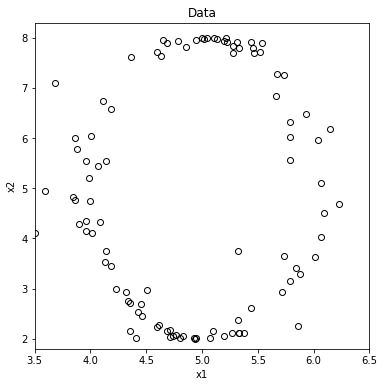

In [1]:
%reset -f
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# I just wanted to see whole my equipments in one file, sorry for disturbance :)
arr = np.array([[5.219,7.998],[5.102,2.163],[4.089,4.327],[5.046,8.000],[4.596,2.238],[4.356,2.157],[5.282,7.841],[3.594,4.953],
[5.376,2.124],[5.320,3.755],[4.938,2.001],[4.003,6.037],[3.988,5.197],[4.137,3.742],[5.535,7.902],[5.332,7.799],[4.712,2.027],
[4.788,7.928],[5.713,2.931],[3.897,4.284],[5.670,7.273],[4.713,2.177],[4.687,7.894],[4.064,5.441],[4.430,2.535],[6.066,4.035],
[5.733,7.255],[6.071,5.107],[5.336,2.123],[4.129,3.523],[4.509,2.979],[4.765,2.080],[6.041,5.963],[5.877,3.291],[4.931,2.012],
[5.224,7.916],[3.502,4.110],[4.805,2.007],[4.942,2.008],[3.957,4.141],[4.323,2.926],[5.199,7.940],[4.227,2.987],[4.612,2.272],
[5.439,2.621],[5.467,7.698],[5.936,6.477],[5.197,2.046],[5.841,3.409],[5.791,3.160],[4.184,3.449],[5.271,2.111],[4.365,7.614],
[4.744,2.047],[4.649,7.963],[5.793,5.572],[4.999,8.000],[4.683,2.147],[4.860,7.811],[5.791,6.329],[5.277,7.696],[4.109,6.748],
[3.877,5.785],[5.735,3.654],[5.324,2.373],[5.318,7.919],[4.462,2.455],[4.410,2.014],[4.636,7.638],[6.017,3.632],[4.336,2.760],
[5.788,6.016],[3.859,6.004],[5.022,7.978],[3.959,4.353],[4.001,4.747],[5.522,7.721],[5.857,2.260],[4.596,7.707],[4.833,2.061],
[5.073,2.009],[6.091,4.502],[3.845,4.835],[3.961,5.543],[5.104,8.000],[5.667,6.842],[6.229,4.691],[4.352,2.719],[4.139,5.550],
[6.148,6.180],[4.456,2.694],[5.459,7.797],[3.861,4.759],[5.139,7.970],[5.435,7.913],[5.333,2.106],[4.016,4.113],[4.187,6.587],
[3.681,7.095],[4.943,7.963]])

x1 = arr[:,0]
x2 = arr[:,1]
data = np.array([x1,x2])
plt.figure(figsize=(6,6))
plt.plot(x1, x2, 'o',markeredgecolor='k',markerfacecolor='None')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(3.5, 6.5)
plt.ylim(1.8, 8.3)
plt.title('Data')

2. Propose a generative model
3. Implement your generative model and sample data from your model 
4. Visualize synthetic data to show that your model generates a 'similar dataset'


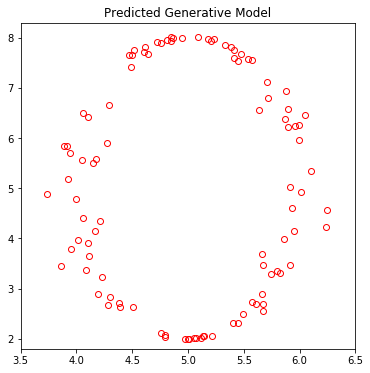

In [4]:
# Predicted Generative Model
N = 100
theta = np.ones((2,N))
theta[1,:] = 3

shift = 5 # shift in the origin
rnd = np.random.rand(1,N)
rowX1 = np.cos(2*np.pi*rnd)
rowX2 = np.sin(2*np.pi*rnd)
u = np.array([rowX1[0],rowX2[0]])

# If noise is dependent on the signal itself, the similarity between model and sample data increases. So I commented the line below.
#rnd = np.random.rand(1,N)
e = 0.13*np.cos(2*np.pi*rnd)*np.random.randn(2,N) 
X = u*theta + 5 + e
model = X

plt.figure(figsize=(6,6))
plt.plot(X[0,:],X[1,:],'o',markeredgecolor='r',markerfacecolor='None')
plt.xlim(3.5, 6.5)
plt.ylim(1.8, 8.3)
plt.title('Predicted Generative Model')
plt.show()

\begin{eqnarray}
w & \sim & \mathcal{U}(0,1) \\
u & = & \left(\begin{array}{c} \cos(2\pi w) \\ \sin(2\pi w) \end{array}\right) \\
e & \sim & \mathcal{N}\left(0, (\sigma u_{[0]})^2 \left(\begin{array}{cc}  1 & 0\\  0 & 1\\\end{array}\right) \right) \\
x & \sim & \left(\begin{array}{c} \theta_1 \\ \theta_2 \end{array} \right)u + shift + e
\end{eqnarray}

## How can you assess if two datasets are similar? Discuss

Kolmogorov-Smirnov test is generally can be used to see if two data sets are coming from the same distribution or not. However, there is no accepted method to apply Kolmogorov-Smirnov test for two-dimensional data. Instead, the test is applied in dimension-wise manner and resulted that two datasets are more similar in y(sin) dimension than in x(cos) dimension (p=0.67>p=0.26). This result is consistent with our standart deviation factor, which adds cos-wise noise to the system.

In [5]:
from scipy.stats import ks_2samp

print(ks_2samp(data[0,:], model[0,:]))
print(ks_2samp(data[1,:], model[1,:]))

Ks_2sampResult(statistic=0.14000000000000001, pvalue=0.26055273160812736)
Ks_2sampResult(statistic=0.10000000000000001, pvalue=0.67662014970024587)
